In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from gensim.models import Word2Vec
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **import the Text Files**

In [ ]:
file_path = '/content/FriendShip.txt'

In [ ]:
# Read documents from the file
with open(file_path , 'r' , encoding='utf-8') as file:
    FriendShip = file.readlines()

# **Data Preprocessing and Tokenization**

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return tokens

In [ ]:
for text in FriendShip:
  data_preprocesed = preprocess_text(text)
print(data_preprocesed)
print(len(data_preprocesed))

['both', 'jim', 'and', 'i', 'were', 'forced', 'to', 'put', 'in', 'more', 'effort', 'when', 'he', 'moved', 'across', 'the', 'country', 'to', 'the', 'east', 'coast', 'because', 'we', 'already', 'had', 'such', 'a', 'strong', 'foundation', 'this', 'didnt', 'impact', 'our', 'friendship', 'we', 'talk', 'all', 'of', 'the', 'time', 'and', 'see', 'each', 'other', 'several', 'times', 'a', 'year', 'we', 'make', 'the', 'relationship', 'a', 'priority', 'no', 'matter', 'what', 'coast', 'each', 'other', 'is', 'on', 'like', 'anything', 'in', 'life', 'that', 'is', 'valuable', 'to', 'us', 'we', 'must', 'work', 'at', 'it', 'and', 'put', 'time', 'and', 'effort', 'into', 'it']
83


# **Word Embedding**

In [ ]:
model = Word2Vec(data_preprocesed, vector_size = 10 , window = 5)

In [ ]:
print("Word Embeddings: ")
for i in data_preprocesed:
  first_word_embeddings = model.wv['i']
  print(first_word_embeddings)

Word Embeddings: 
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-02
  5.3284151e-05 -3.1989638e-03 -7.5843021e-02  9.6359588e-02
  4.9233887e-02  9.2528686e-02]
[-9.6267425e-02  5.0311282e-02 -8.7727703e-02 -4.3588746e-

# **Tokenization for The Second Document**

In [ ]:
Football = '/content/Football.txt'

# Read documents from the file
with open(Football , 'r' , encoding='utf-8') as file:
    Football = file.readlines()

In [ ]:
for text in Football:
  preprocesed = preprocess_text(text)
print(preprocesed)
print(len(preprocesed))

['the', 'issue', 'of', 'professionalism', 'reached', 'a', 'crisis', 'in', 'england', 'in', 'when', 'the', 'fa', 'expelled', 'two', 'clubs', 'for', 'using', 'professional', 'players', 'however', 'the', 'payment', 'of', 'players', 'had', 'become', 'so', 'commonplace', 'by', 'then', 'that', 'the', 'fa', 'had', 'little', 'option', 'but', 'to', 'sanction', 'the', 'practice', 'a', 'year', 'later', 'despite', 'initial', 'attempts', 'to', 'restrict', 'professionalism', 'to', 'reimbursements', 'for', 'broken', 'time', 'the', 'consequence', 'was', 'that', 'northern', 'clubs', 'with', 'their', 'large', 'supporter', 'bases', 'and', 'capacity', 'to', 'attract', 'better', 'players', 'came', 'to', 'prominence', 'as', 'the', 'influence', 'of', 'workingclass', 'players', 'rose', 'in', 'football', 'the', 'upper', 'classes', 'took', 'refuge', 'in', 'other', 'sports', 'notably', 'cricket', 'and', 'rugby', 'union', 'professionalism', 'also', 'sparked', 'further', 'modernization', 'of', 'the', 'game', 'thro

# **Word Embedding For the second Documnet**

In [ ]:
model = Word2Vec(preprocesed, vector_size = 10 , window = 5)

In [ ]:
print("Word Embeddings: ")
for i in preprocesed:
  second_word_embeddings = model.wv['i']
  print(second_word_embeddings)

Word Embeddings: 
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977]
[-0.08503411  0.0459915  -0.04137904  0.00257197  0.09780502 -0.04169269
  0.06381754 -0.04946865 -0.05099678  0.10605977

# **Calculate Similarity**

1- **Cosine Similarity**

In [ ]:
documents = [
    "Football game in which two teams of 11 players",
    "Football is the world’s most popular ball game in numbers of participants and spectators",
    "Modern football originated in Britain in the 19th century",
    "The development of modern football was closely tied to processes of industrialization and urbanization in Victorian Britain",
    "Most clubs in England were owned and controlled by businessmen but shareholders received very low, if any dividends; their main reward was an enhanced public status through running the local club."
]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

similarity_matrix = cosine_similarity(tfidf_matrix)

print("The Cosine Similarity:")
print(similarity_matrix)


The Cosine Similarity:
[[1.         0.20106959 0.12380721 0.15476556 0.01656041]
 [0.20106959 1.         0.14200127 0.19259351 0.09743257]
 [0.12380721 0.14200127 1.         0.27366664 0.05999343]
 [0.15476556 0.19259351 0.27366664 1.         0.08552519]
 [0.01656041 0.09743257 0.05999343 0.08552519 1.        ]]


**2- Euclidean Distance**

In [ ]:
euclidean_distance = np.linalg.norm(first_word_embeddings - second_word_embeddings)
print("The Euclidean Distance = " , euclidean_distance)

The Euclidean Distance =  0.25780082


**3- Jaccard Similarity**

In [ ]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [ ]:
jaccard_similarity = jaccard(first_word_embeddings , second_word_embeddings)
print("Jaccard Similarity = " , jaccard_similarity)

Jaccard Similarity =  0.0


# **Visualization**

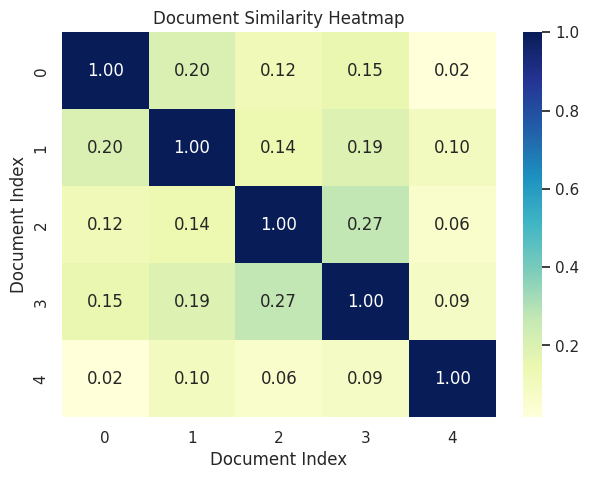

In [ ]:
sns.set(style="white")
plt.figure(figsize=(7, 5))

heatmap = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)

plt.title('Document Similarity Heatmap')
plt.xlabel('Document Index')
plt.ylabel('Document Index')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


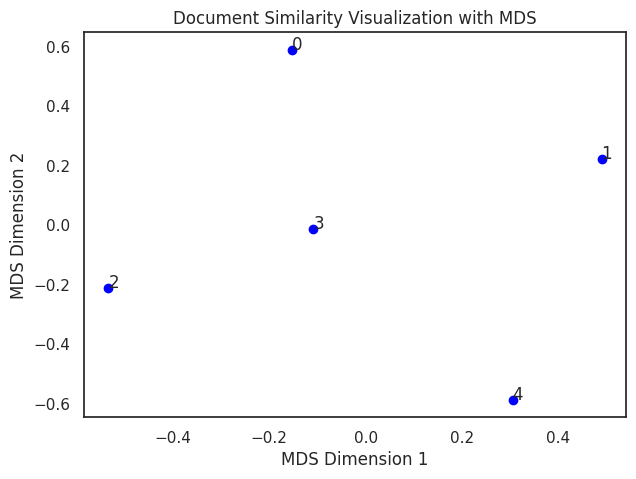

In [ ]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(1 - similarity_matrix)


plt.figure(figsize=(7, 5))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='blue', marker='o')

for i, txt in enumerate(range(similarity_matrix.shape[0])):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]))

plt.title('Document Similarity Visualization with MDS')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()